# Exploratory Data Analysis

### In order to Know more about the data and check how the data is distributed and to know more about the trend we have to perform some EDA.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For better visuals in Jupyter
%matplotlib inline  

# Load the dataset
df = pd.read_csv("Acme_Synthetic_Dataset.csv")

# Preview the top rows
df.head()


,Portfolio,Geography,Category,Brand,Segment,Initial_Sales,Margin,Min_Trend,Max_Trend,Min_Contribution,Max_Contribution
0,Hair/APDO,Asia,Tools,Balmain,Fragrance,2734489,50,0,15,4,30
1,Hair/APDO,South America,Face Make-Up,Balmain,Fragrance,1739911,33,0,15,4,30
2,Hair/APDO,Europe,Tools,Frederic Malle,Bronzer,3844769,59,-3,4,4,30
3,Skin/Body,North America,Make Up Brushes,Frederic Malle,Fragrance,1417040,41,-3,4,5,40
4,Hair/APDO,South America,Hair Dye,Bobbi Brown,Bronzer,2000942,45,-1,3,7,14


## Basic Checks: Nulls, Duplicates, Data Types

In [13]:
# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates (optional)
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Quick overview of data types
print("\nData types:")
print(df.dtypes)


Dataset shape: (1000, 11)

Missing values per column:
Portfolio           0
Geography           0
Category            0
Brand               0
Segment             0
Initial_Sales       0
Margin              0
Min_Trend           0
Max_Trend           0
Min_Contribution    0
Max_Contribution    0
dtype: int64

Number of duplicate rows: 0

Data types:
Portfolio           object
Geography           object
Category            object
Brand               object
Segment             object
Initial_Sales        int64
Margin               int64
Min_Trend            int64
Max_Trend            int64
Min_Contribution     int64
Max_Contribution     int64
dtype: object


In [14]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Initial_Sales,1000.0,2778951.325,1.283534e+06,521253.0,1733360.25,2741083.0,3950315.5,4997968.0
Margin,1000.0,45.580,8.963143e+00,30.0,38.00,46.0,53.0,60.0
Min_Trend,1000.0,-2.294,2.125578e+00,-5.0,-5.00,-1.0,0.0,0.0
Max_Trend,1000.0,9.761,5.357105e+00,3.0,4.00,7.0,15.0,15.0
Min_Contribution,1000.0,5.309,1.019096e+00,4.0,5.00,5.0,6.0,7.0
Max_Contribution,1000.0,28.947,1.120579e+01,14.0,15.00,30.0,40.0,40.0


## Visualizations

### Distribution of Initial_Sales

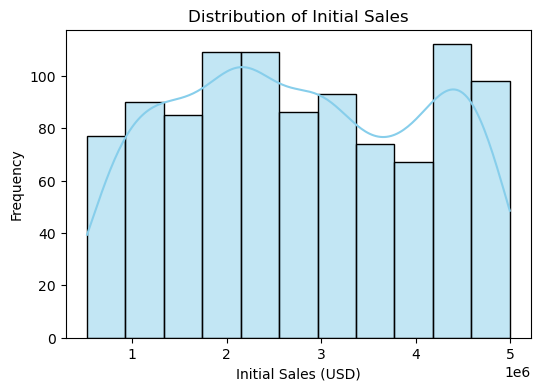

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Initial_Sales", kde=True, color="skyblue")
plt.title("Distribution of Initial_Sales")
plt.xlabel("Initial_Sales (USD)")
plt.ylabel("Frequency")
plt.show()

### Boxplot of Margin

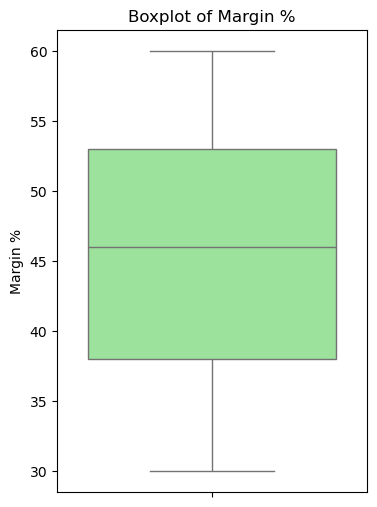

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df, y="Margin", color="lightgreen")
plt.title("Boxplot of Margin")
plt.ylabel("Margin")
plt.show()


### Correlation Heatmap

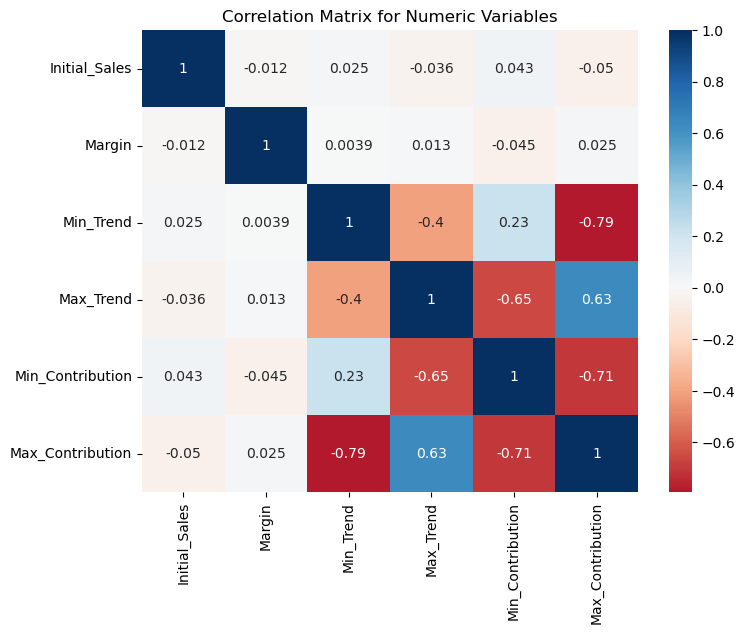

In [18]:
# Only numeric columns
numeric_cols = ["Initial_Sales", "Margin", 
                "Min_Trend", "Max_Trend", 
                "Min_Contribution", "Max_Contribution"]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()


### Average Sales & Margin by Brand

C:\Users\shiva\AppData\Local\Temp\ipykernel_32424\3940196997.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_brand, x="Brand", y="Initial_Sales", palette="Spectral")
C:\Users\shiva\AppData\Local\Temp\ipykernel_32424\3940196997.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_brand, x="Brand", y="Margin", palette="Spectral")


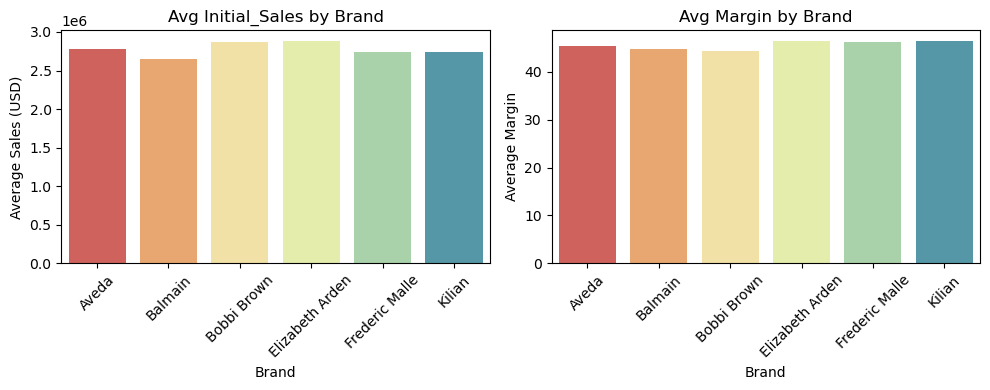

In [19]:
grouped_brand = df.groupby("Brand")[["Initial_Sales", "Margin"]].mean().reset_index()


plt.figure(figsize=(10,4))

# Left subplot: Average Initial_Sales by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=grouped_brand, x="Brand", y="Initial_Sales", palette="Spectral")
plt.title("Avg Initial_Sales by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Sales (USD)")
plt.xticks(rotation=45)

# Right subplot: Average Margin by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=grouped_brand, x="Brand", y="Margin", palette="Spectral")
plt.title("Avg Margin by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Margin")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Trend Range vs. Brand

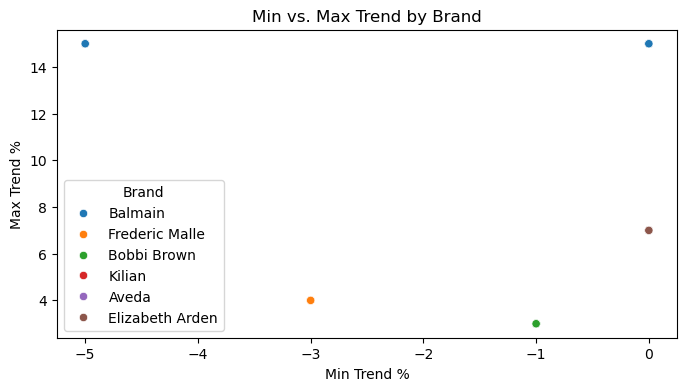

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="Min_Trend", y="Max_Trend", hue="Brand")
plt.title("Min vs. Max Trend by Brand")
plt.xlabel("Min Trend %")
plt.ylabel("Max Trend %")
plt.show()


### Contribution Range Distribution

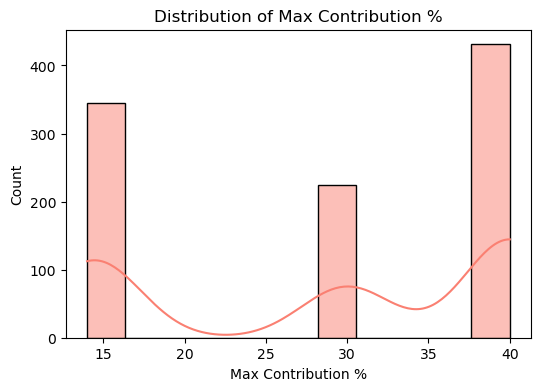

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Max_Contribution", kde=True, color="salmon")
plt.title("Distribution of Max Contribution %")
plt.xlabel("Max Contribution %")
plt.show()
